<a href="https://colab.research.google.com/github/AliWindsor/Road-Sign-Image-Classification-Model/blob/main/ImageClassification_ModelThree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Used CNN and Image Classification tutorials on tensorflow as a starting point.
#You can download the zip file for the dataset here: https://drive.google.com/file/d/11I5pDQnr-MDRZWrLEYpSNfjArvtgW15n/view?usp=sharing

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
from google.colab import drive 

#The below two lines need to be uncommented prior to running this code cell for the first time.
drive.mount('/content/drive')
!unzip -q "drive/My Drive/roadsign_photos.zip"

data_dir_train = "roadsign_photos/Train"
data_dir_train = pathlib.Path(data_dir_train)

test_data = "roadsign_photos/Test"
test_data = pathlib.Path(test_data)
testImg = list(test_data.glob('*.png'))



Mounted at /content/drive


In [2]:
#Dataset

#Parameters
batch_size = 32
img_height = 180
img_width = 180

#Training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

#Validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

#Class Names
class_names=train_ds.class_names
print(class_names)

Found 39419 files belonging to 43 classes.
Using 31536 files for training.
Found 39419 files belonging to 43 classes.
Using 7883 files for validation.
['100_speed', '120_speed', '20_speed', '30_speed', '50_speed', '60_speed', '70_speed', '80_speed', 'ahead_only', 'ahead_or_left', 'ahead_or_right', 'ahead_traffic_light', 'ahead_turn_left', 'ahead_turn_right', 'animals', 'bend_double', 'bend_left', 'bend_right', 'caution', 'caution_snow', 'children ', 'crossroads_ahead', 'cyclists', 'no_entry', 'no_overtaking', 'no_overtaking_end', 'no_overtaking_trucks', 'no_overtaking_trucks_end', 'no_power_driven', 'pass_left', 'pass_right', 'pedestrians', 'priority_road', 'prohibited', 'road_narrows_right', 'road_works', 'roundabout', 'slippery_when_wet', 'speed_limit_end', 'stop', 'uneven_road', 'yield', 'zone_restriction_end']


In [3]:
#No overfitting used as dataset is large

num_classes = len(class_names)

tsi_model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height,img_width,3)),
  layers.Conv2D(16,(3), activation='relu'), #layers.Conv2D(filters , kernal size, activation)
  layers.MaxPooling2D(),
  layers.Conv2D(32,(3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32,(3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,(3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,(3), activation='relu'),
  layers.Dropout(0.2),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [4]:
tsi_model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0

In [5]:
tsi_epochs=10

tsi_model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tsi_history = tsi_model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=tsi_epochs)

Epoch 1/10
986/986 [==============================] - 91s 59ms/step - loss: 1.7406 - accuracy: 0.5346 - val_loss: 0.1263 - val_accuracy: 0.9688
Epoch 2/10
986/986 [==============================] - 58s 59ms/step - loss: 0.1291 - accuracy: 0.9647 - val_loss: 0.0944 - val_accuracy: 0.9727
Epoch 3/10
986/986 [==============================] - 58s 59ms/step - loss: 0.0660 - accuracy: 0.9813 - val_loss: 0.0646 - val_accuracy: 0.9817
Epoch 4/10
986/986 [==============================] - 58s 59ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0596 - val_accuracy: 0.9840
Epoch 5/10
986/986 [==============================] - 58s 59ms/step - loss: 0.0381 - accuracy: 0.9892 - val_loss: 0.0377 - val_accuracy: 0.9890
Epoch 6/10
986/986 [==============================] - 58s 59ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0331 - val_accuracy: 0.9893
Epoch 7/10
986/986 [==============================] - 60s 60ms/step - loss: 0.0268 - accuracy: 0.9923 - val_loss: 0.0529 - val_accuracy:

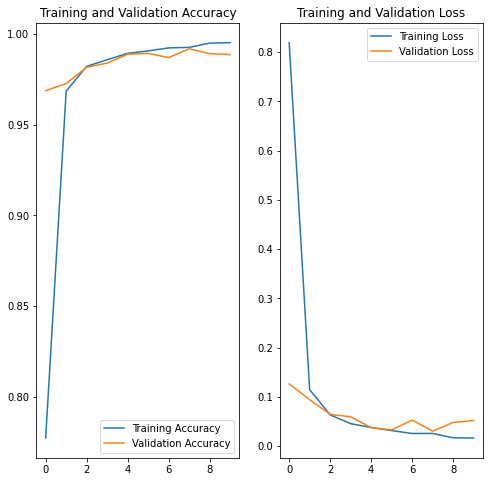

In [6]:
acc = tsi_history.history['accuracy']
val_acc = tsi_history.history['val_accuracy']

loss = tsi_history.history['loss']
val_loss = tsi_history.history['val_loss']

epochs_range = range(tsi_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0.5, 158.09375, 'Predicted label')

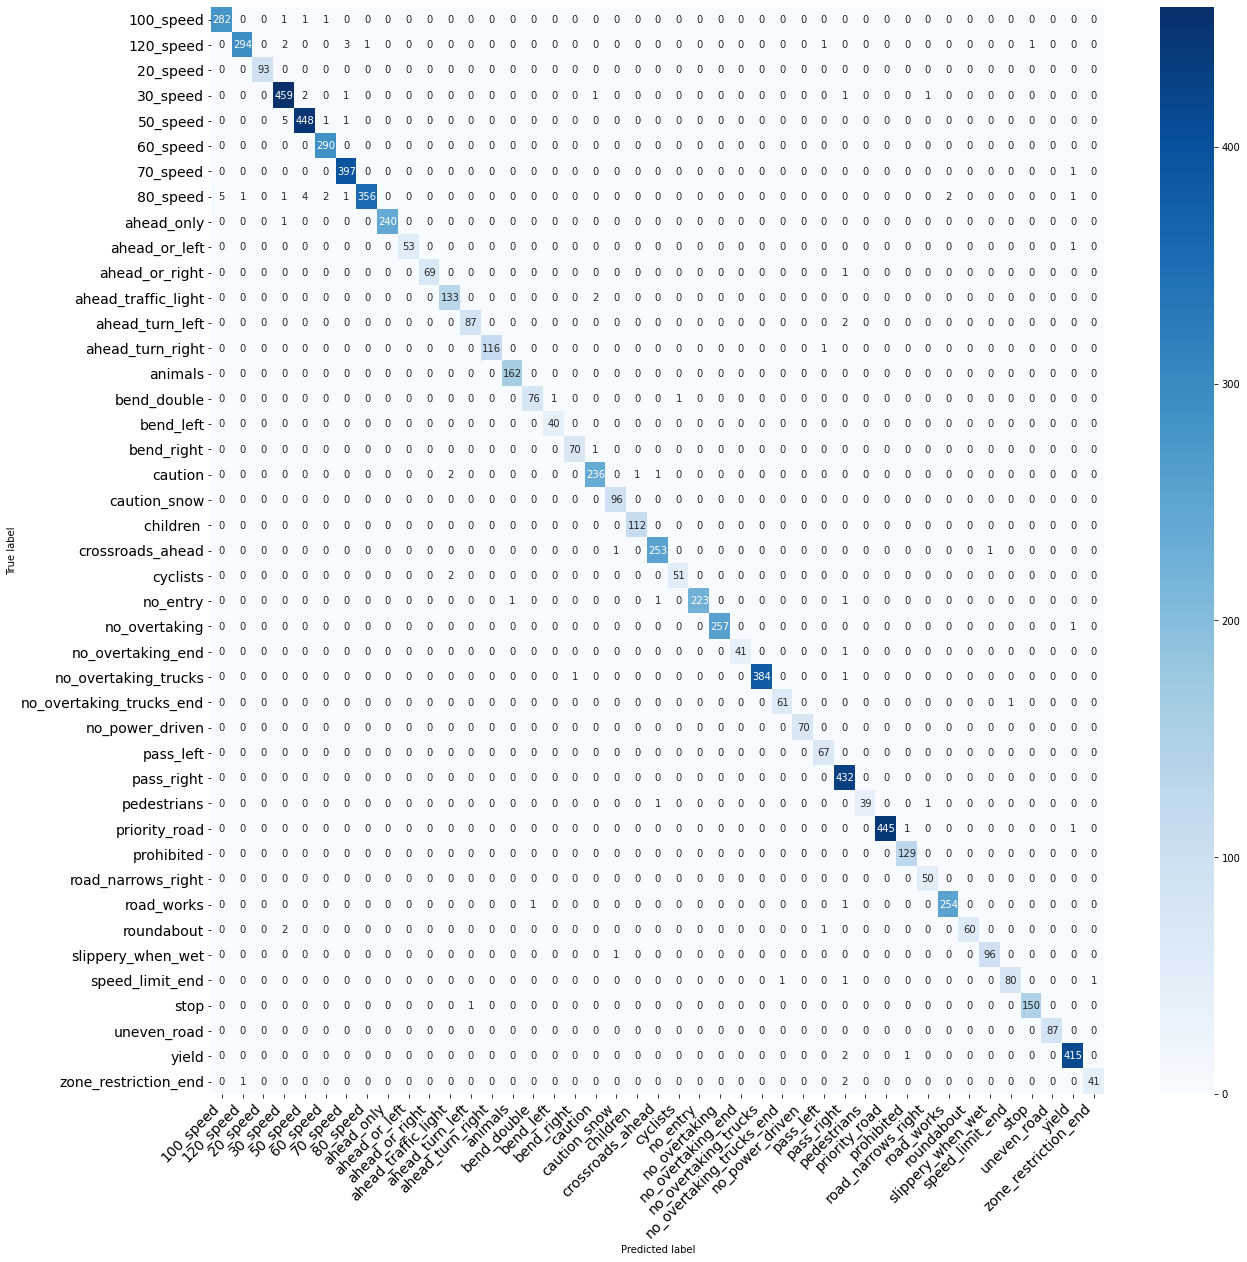

In [7]:
from string import ascii_uppercase
from pandas import DataFrame
import seaborn as sn
from sklearn.metrics import confusion_matrix

predictions = np.array([])
labels =  np.array([])
for x, y in val_ds:
  predictions = np.concatenate([predictions, np.argmax(tsi_model3.predict(x),  axis=-1)])
  labels = np.concatenate([labels, y.numpy()])

figsize = (20,20)
fontsize= 14
columns = [class_names[0:len(np.unique(labels))]]

confm = confusion_matrix(labels, predictions)
df_cm = DataFrame(confm, index=columns, columns=columns)

fig = plt.figure(figsize=figsize)

heatmap = sn.heatmap(df_cm, annot=True, fmt="d", cmap = "Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)

plt.ylabel('True label')
plt.xlabel('Predicted label')

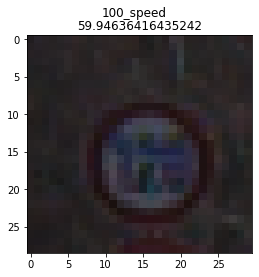

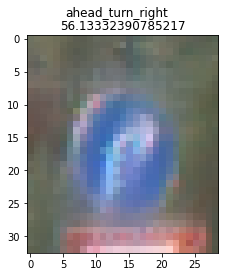

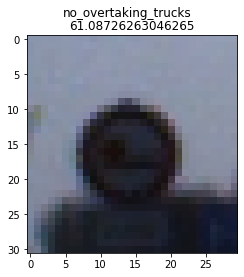

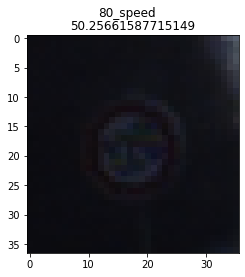

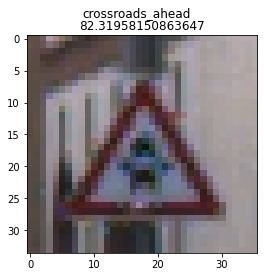

Text(0.5, 1.0, 'Unlabed Testing Results')

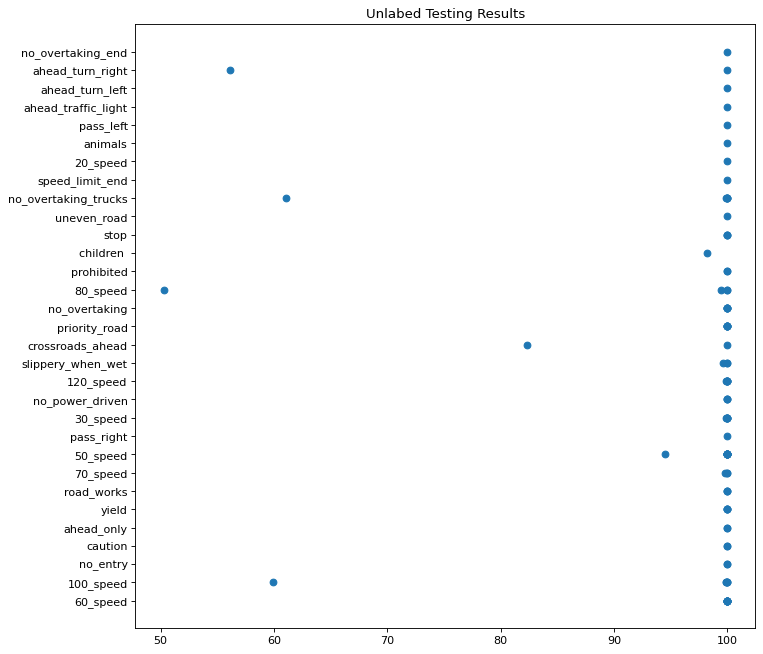

In [8]:
import matplotlib.image as mpimg

arr_name = []
arr_score = []

for i in range(100):

  img = keras.preprocessing.image.load_img(
        testImg[i], target_size=(img_height, img_width))
      
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions2 = tsi_model3.predict(img_array)
  score = tf.nn.softmax(predictions2[0])

  predictionScore = 100 * np.max(score)
  predictionName = class_names[np.argmax(score)]

  arr_name.append(predictionName)
  arr_score.append(predictionScore)

  if predictionScore <= 90:
    img = mpimg.imread(str(testImg[i]))
    imgplot = plt.imshow(img)
    plt.title(predictionScore)
    plt.suptitle(predictionName)
    plt.show()
plt.figure(figsize=(10, 10), dpi=80) 
plt.scatter(arr_score, arr_name)
plt.title("Unlabed Testing Results")

In [9]:
import sklearn as sk
print (sk.metrics.precision_score(labels, predictions, average="weighted"))
print (sk.metrics.recall_score(labels, predictions, average="weighted"))
print (sk.metrics.f1_score(labels, predictions, average="weighted"))


0.9888247165141367
0.98870988202461
0.9886939995626275
